In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# importing necessary libraries


In [ ]:
df = pd.read_csv('/content/Titanic_train.csv')

In [ ]:
df.head(10)  # seeing first 10 entries of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#EDA

In [ ]:
# missing values

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Imputation with Mean/Median: This involves replacing missing values with the average or median age of the other passengers.


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # Using median

<ipython-input-91-69f2cb9167b0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Using median


In [ ]:
# since ['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'] this features ares are not that
# important so  we can drop them

In [ ]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'], axis=1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,28.0,1,2,S
889,1,1,male,26.0,0,0,C


##visualization


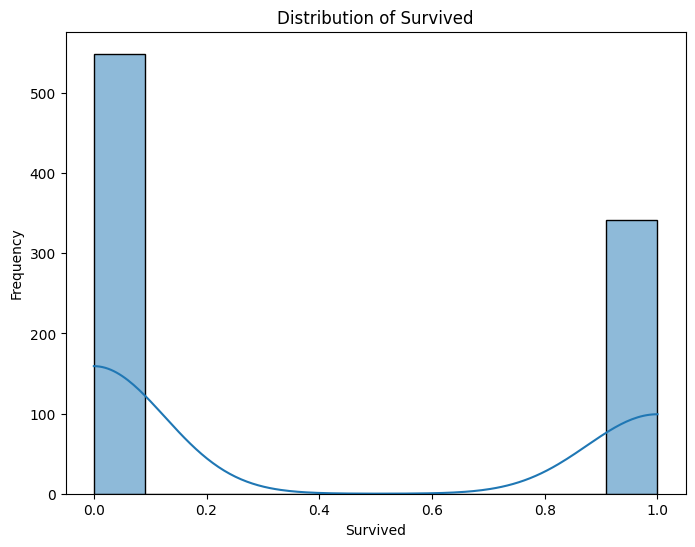

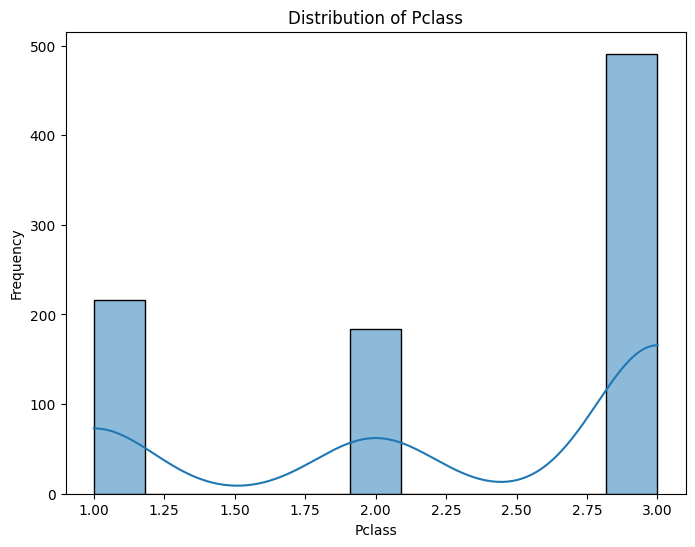

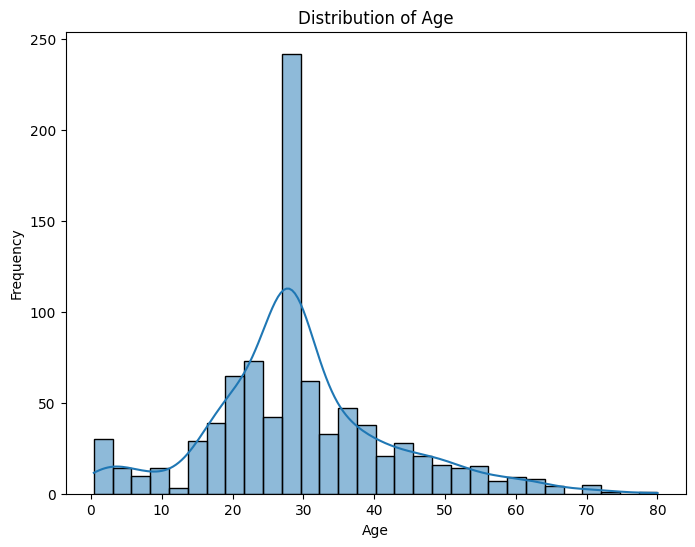

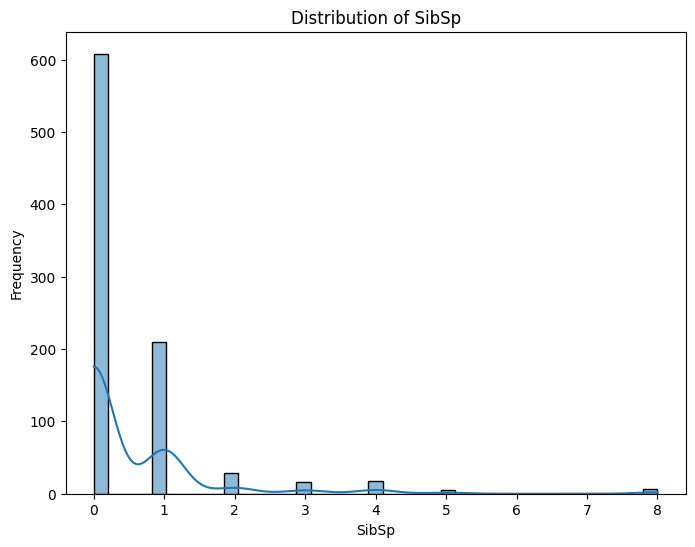

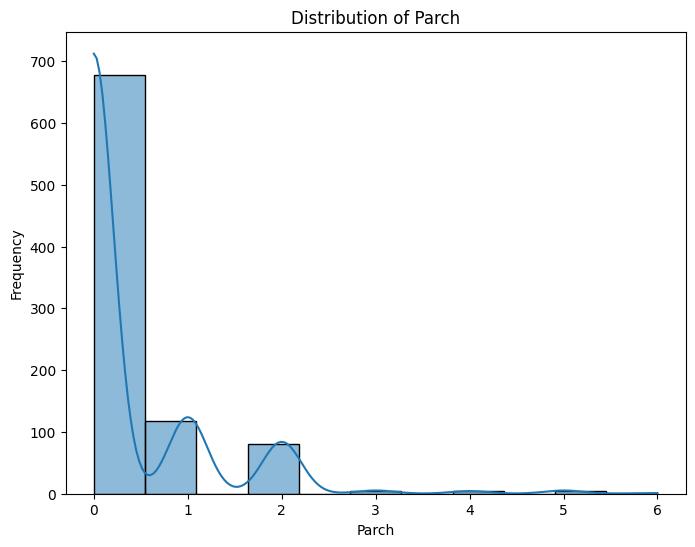

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Create histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Scatterplot

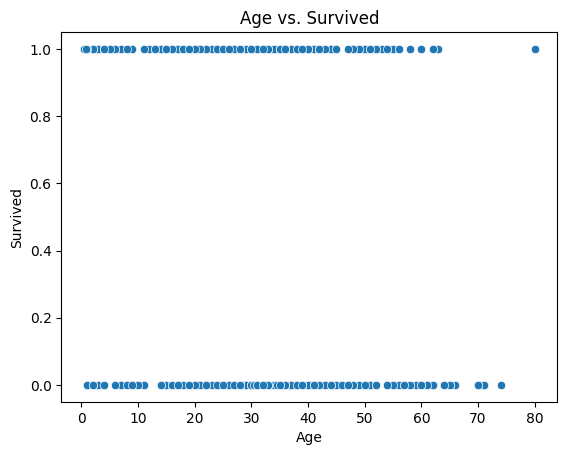

In [ ]:
sns.scatterplot(x='Age', y='Survived', data=df)
plt.title('Age vs. Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

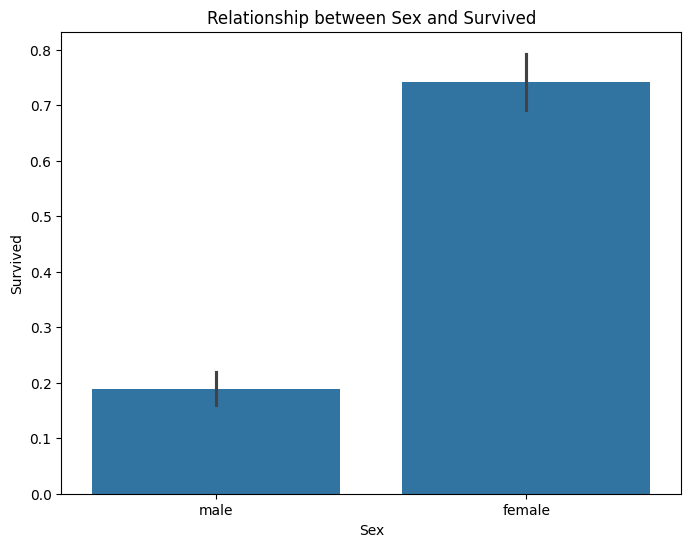

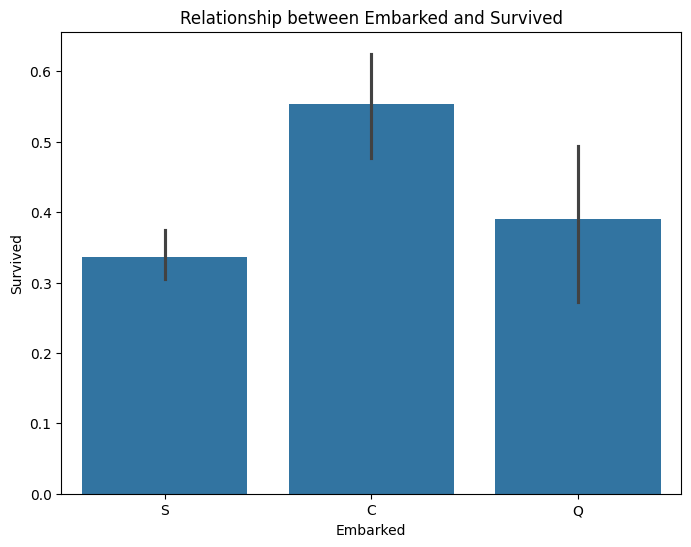

In [ ]:
categorical_features = [ 'Sex', 'Embarked']
target_variable = 'Survived'

# Create bar plots
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y=target_variable, data=df)
    plt.title(f'Relationship between {feature} and {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()

# Data Preprocessing

In [ ]:
encoded_df = pd.get_dummies(df, columns = categorical_features,dtype=int)
df = encoded_df

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,0,1,0,0,1
887,1,1,19.0,0,0,1,0,0,0,1
888,0,3,28.0,1,2,1,0,0,0,1
889,1,1,26.0,0,0,0,1,1,0,0


#Building Predictive Models:

In [ ]:
# splittng dataseet into training and testing

In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# model building
# LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42)

# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42)

In [ ]:
# Train the models
lgb_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)

# Make predictions
lgb_pred = lgb_model.predict(x_test)
xgb_pred = xgb_model.predict(x_test)

# Evaluate LightGBM
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)
print("LightGBM - Accuracy:", lgb_accuracy)
print("LightGBM - F1-Score:", lgb_f1)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
print("XGBoost - Accuracy:", xgb_accuracy)
print("XGBoost - F1-Score:", xgb_f1)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

#prediction on testing data (without hyper parameter tuning)

In [ ]:
# testing set
test_df = pd.read_csv('/content/Titanic_test.csv')
X_test = df.drop('Survived', axis=1)
Y_test = df['Survived']


In [ ]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'], axis=1)
encoded_test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], dtype=int)
test_df = encoded_test_df
test_df

<ipython-input-106-8ab8c7549132>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)


,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,0,1,0,1,0
1,3,47.0,1,0,1,0,0,0,1
2,2,62.0,0,0,0,1,0,1,0
3,3,27.0,0,0,0,1,0,0,1
4,3,22.0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,0,1,0,0,1
414,1,39.0,0,0,1,0,1,0,0
415,3,38.5,0,0,0,1,0,0,1
416,3,27.0,0,0,0,1,0,0,1


In [ ]:
X_test = df.drop('Survived', axis=1)
Y_test = df['Survived']

In [ ]:
test_predictions_lgb = best_lgb_model.predict(X_test)  # Predictions using LightGBM
test_predictions_xgb = best_xgb_model.predict(X_test)  # Predictions using XGBoost

In [ ]:
lgb_accuracy = accuracy_score(Y_test, test_predictions_lgb)
lgb_f1 = f1_score(Y_test, test_predictions_lgb)
print("LightGBM - Accuracy:", lgb_accuracy)
print("LightGBM - F1-Score:", lgb_f1)

xgb_accuracy = accuracy_score(Y_test, test_predictions_xgb)
xgb_f1 = f1_score(Y_test, test_predictions_xgb)
print("XGBoost - Accuracy:", xgb_accuracy)
print("XGBoost - F1-Score:", xgb_f1)

LightGBM - Accuracy: 0.8395061728395061
LightGBM - F1-Score: 0.7644151565074135
XGBoost - Accuracy: 0.8922558922558923
XGBoost - F1-Score: 0.8495297805642633


##hyperparameter tuning(on training data)

In [ ]:
lgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],

}

xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],

}

# Create GridSearchCV objects
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=5, scoring='f1')
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='f1')

# Fit the GridSearchCV
lgb_grid.fit(x_train, y_train)
xgb_grid.fit(x_train, y_train)
best_lgb_model = lgb_grid.best_estimator_
best_xgb_model = xgb_grid.best_estimator_


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Evaluate LightGBM
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)
print("LightGBM - Accuracy:", lgb_accuracy)
print("LightGBM - F1-Score:", lgb_f1)
# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
print("XGBoost - Accuracy:", xgb_accuracy)
print("XGBoost - F1-Score:", xgb_f1)

LightGBM - Accuracy: 0.8268156424581006
LightGBM - F1-Score: 0.7832167832167832
XGBoost - Accuracy: 0.8324022346368715
XGBoost - F1-Score: 0.782608695652174


In [ ]:
# Get the best models
best_lgb_model = lgb_grid.best_estimator_
best_xgb_model = xgb_grid.best_estimator_
# Evaluate the best LightGBM model on the testing set
lgb_pred_best = best_lgb_model.predict(x_test)
lgb_accuracy_best = accuracy_score(y_test, lgb_pred_best)
lgb_f1_best = f1_score(y_test, lgb_pred_best)
print("Best LightGBM - Accuracy:", lgb_accuracy_best)
print("Best LightGBM - F1-Score:", lgb_f1_best)

# Evaluate the best XGBoost model on the testing set
xgb_pred_best = best_xgb_model.predict(x_test)
xgb_accuracy_best = accuracy_score(y_test, xgb_pred_best)
xgb_f1_best = f1_score(y_test, xgb_pred_best)
print("Best XGBoost - Accuracy:", xgb_accuracy_best)
print("Best XGBoost - F1-Score:", xgb_f1_best)

Best LightGBM - Accuracy: 0.8212290502793296
Best LightGBM - F1-Score: 0.7647058823529411
Best XGBoost - Accuracy: 0.8379888268156425
Best XGBoost - F1-Score: 0.7913669064748201


#Comparative Analysis:
After hyperparameter tuning we can see that there is slightly change in accuracy and f1 score .

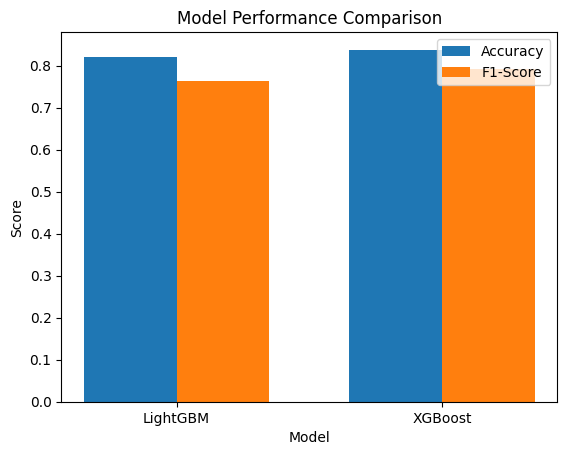

In [ ]:
# Visual Analysis
models = ['LightGBM', 'XGBoost']
accuracy_scores = [lgb_accuracy_best, xgb_accuracy_best]
f1_scores = [lgb_f1_best, xgb_f1_best]
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots()
accuracy_bars = ax.bar(index, accuracy_scores, bar_width, label='Accuracy')
f1_bars = ax.bar(index + bar_width, f1_scores, bar_width, label='F1-Score')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.show()